In [127]:
from pkg import *

# ----- Define Standardise Function -----

def standardise(data):
    for col in data.columns:
        if col not in ['id', 'use', 'ir_agn', 'xray_agn', 'radio_agn', 'agn', 'true_agn']:
            data[col] = (data[col] - data[col].mean()) / data[col].std()
    return data

# ----- Exclude Booleans, Use Flag and ID -----

exclude_cols = ['id', 'use', 'ir_agn', 'xray_agn', 'radio_agn', 'agn', 'true_agn']
 
cdfs, cos, uds = cdfs.copy(), cos.copy(), uds.copy()

cdfs, cos, uds = standardise(cdfs.drop(columns = exclude_cols)), standardise(cos.drop(columns = exclude_cols)), standardise(uds.drop(columns = exclude_cols))

# ----- Standardise and Overwrite NaNs -----

cdfs, cos, uds = standardise(cdfs), standardise(cos), standardise(uds)
cdfs, cos, uds = np.array(cdfs), np.array(cos), np.array(uds)
cdfs, cos, uds = np.nan_to_num(cdfs), np.nan_to_num(cos), np.nan_to_num(uds)

cdfs = np.nan_to_num(np.array(cdfs)) #
cos = np.nan_to_num(np.array(cos))
uds = np.nan_to_num(np.array(uds))

# ----- PCA -----

pca_cdfs = PCA()
pca_cos = PCA()
pca_uds = PCA()

cdfs = pca_cdfs.fit_transform(cdfs)
cos = pca_cos.fit_transform(cos)
uds = pca_uds.fit_transform(uds)

cdfs_pca_df = pd.DataFrame(cdfs, columns=[f'PC{i+1}' for i in range(cdfs.shape[1])])
cdfs_pca_df = pd.concat([cdfs[exclude_cols].reset_index(drop=True), cdfs_pca_df], axis=1)

cos_pca_df = pd.DataFrame(cos, columns=[f'PC{i+1}' for i in range(cos.shape[1])])
cos_pca_df = pd.concat([cos[exclude_cols].reset_index(drop=True), cos_pca_df], axis=1)

uds_pca_df = pd.DataFrame(uds, columns=[f'PC{i+1}' for i in range(uds.shape[1])])
uds_pca_df = pd.concat([uds[exclude_cols].reset_index(drop=True), uds_pca_df], axis=1)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [125]:
from pkg import *
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def standardise(data):
    for col in data.columns:
        if col not in exclude_cols:
            data[col] = (data[col] - data[col].mean()) / data[col].std()
    return data

# Exclude columns that should not be standardized or included in PCA
exclude_cols = ['id', 'use', 'ir_agn', 'xray_agn', 'radio_agn', 'agn', 'true_agn']

# Standardize each dataset, excluding certain columns
cdfs, cos, uds = cdfs.copy(), cos.copy(), uds.copy()
cdfs_std = standardise(cdfs.drop(columns=exclude_cols))
cos_std = standardise(cos.drop(columns=exclude_cols))
uds_std = standardise(uds.drop(columns=exclude_cols))

# Convert standardized data to numpy arrays for PCA
cdfs_arr = np.nan_to_num(np.array(cdfs_std))
cos_arr = np.nan_to_num(np.array(cos_std))
uds_arr = np.nan_to_num(np.array(uds_std))

# Fit PCA on the standardized columns
pca_cdfs = PCA()
pca_cos = PCA()
pca_uds = PCA()

cdfs_pca = pca_cdfs.fit_transform(cdfs_arr)
cos_pca = pca_cos.fit_transform(cos_arr)
uds_pca = pca_uds.fit_transform(uds_arr)

# Convert PCA results back to DataFrame and add excluded columns
cdfs_pca_df = pd.DataFrame(cdfs_pca, columns=[f'PC{i+1}' for i in range(cdfs_pca.shape[1])])
cdfs_pca_df = pd.concat([cdfs[exclude_cols].reset_index(drop=True), cdfs_pca_df], axis=1)

cos_pca_df = pd.DataFrame(cos_pca, columns=[f'PC{i+1}' for i in range(cos_pca.shape[1])])
cos_pca_df = pd.concat([cos[exclude_cols].reset_index(drop=True), cos_pca_df], axis=1)

uds_pca_df = pd.DataFrame(uds_pca, columns=[f'PC{i+1}' for i in range(uds_pca.shape[1])])
uds_pca_df = pd.concat([uds[exclude_cols].reset_index(drop=True), uds_pca_df], axis=1)

# Now you have the transformed data with principal components and original columns


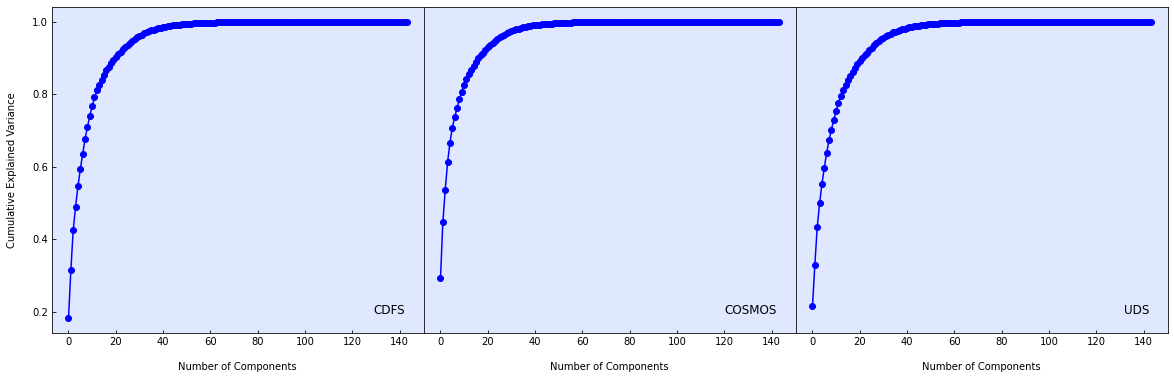

In [115]:
# ----- Define Plot Space, Data, and Labels -----

fig, axes = plt.subplots(1, 3, figsize = (20, 6), sharey = True)
plt.subplots_adjust(wspace = 0.0)

datasets = [pca_cdfs, pca_cos, pca_uds]
labels = ["CDFS", "COSMOS", "UDS"]

# ----- Loop -----

for ax, pca, label in zip(axes, datasets, labels):
    
    ax.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '-', color = 'b')

    ax.set_xlabel('Number of Components')
    if ax == axes[0]:
        ax.set_ylabel('Cumulative Explained Variance')
    else:
        ax.yaxis.set_visible(False)

    # ----- Aesthetics -----
        
    ax.set_facecolor('#e0e8ff')
    ax.tick_params(axis = 'x', direction = 'in')
    ax.tick_params(axis = 'y', direction = 'in')

    ax.yaxis.labelpad = 15
    ax.xaxis.labelpad = 15

    # ----- Field Labels -----

    ax.text(0.95, 0.05, label, transform=ax.transAxes, 
            fontsize = 12, verticalalignment = 'bottom', horizontalalignment = 'right')

plt.show()



In [126]:
# Scatter plot of the first two principal components
def scatter_plot(pca_df, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.title(f'Scatter Plot of the First Two Principal Components for {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

scatter_plot(cdfs, "CDFS")
scatter_plot(cos, "COS")
scatter_plot(uds, "UDS")


KeyError: 'PC1'

<Figure size 720x432 with 0 Axes>

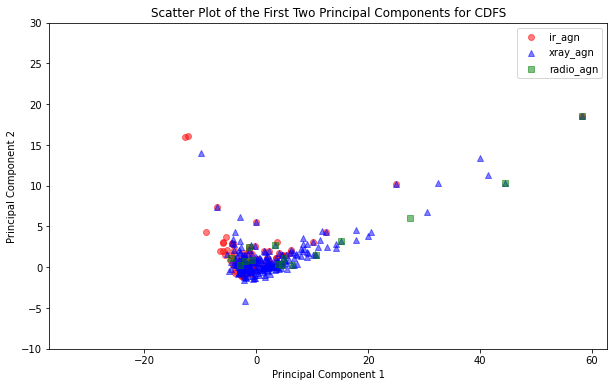

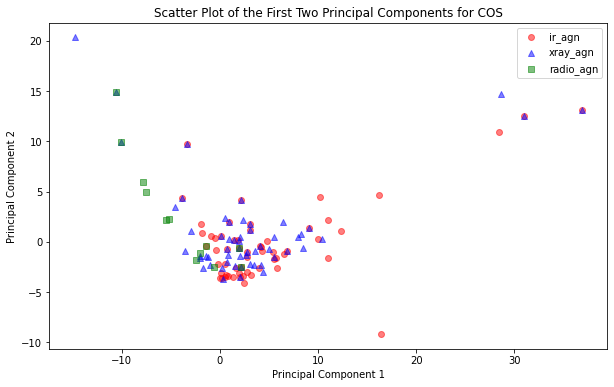

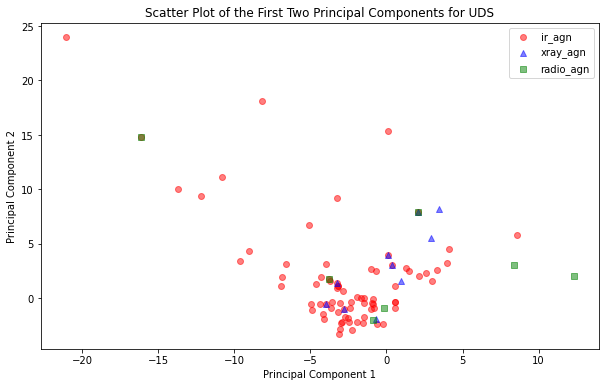

In [65]:
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components with different markers for AGN types
def scatter_plot(pca_df, title, ylim=None):
    plt.figure(figsize=(10, 6))
    
    # Define markers and colors
    markers = {'ir_agn': 'o', 'xray_agn': '^', 'radio_agn': 's'}
    colors = {'ir_agn': 'red', 'xray_agn': 'blue', 'radio_agn': 'green'}
    
    # Plot each AGN type with different markers
    for agn_type in markers.keys():
        subset = pca_df[pca_df[agn_type] == 1]
        plt.scatter(subset['PC1'], subset['PC2'], alpha=0.5, marker=markers[agn_type], color=colors[agn_type], label=agn_type)

    if ylim is not None:
        plt.ylim(-10, ylim)  # Set the upper limit for y-axis if specified
    
    plt.title(f'Scatter Plot of the First Two Principal Components for {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Plot for each dataset
scatter_plot(cdfs_pca_df, "CDFS", ylim=30)
scatter_plot(cos_pca_df, "COS")
scatter_plot(uds_pca_df, "UDS")



In [46]:
import pandas as pd

# Function to get the feature names of the first two principal components
def print_principal_components(pca, features):
    pc1_features = pd.Series(pca.components_[0], index=features)
    pc2_features = pd.Series(pca.components_[1], index=features)
    
    print("Principal Component 1 most influential features:")
    print(pc1_features.sort_values(ascending=False).head())
    
    print("\nPrincipal Component 2 most influential features:")
    print(pc2_features.sort_values(ascending=False).head())

# Assuming cdfs, cos, uds are your original DataFrames without the excluded columns
print("CDFS Principal Components:")
print_principal_components(pca_cdfs, cdfs_std.columns)

print("\nCOS Principal Components:")
print_principal_components(pca_cos, cos_std.columns)

print("\nUDS Principal Components:")
print_principal_components(pca_uds, uds_std.columns)


CDFS Principal Components:
Principal Component 1 most influential features:
f_36      0.178425
f_Ks      0.177562
SNR_Hl    0.176732
SNR_Hs    0.176572
SNR_J3    0.175894
dtype: float64

Principal Component 2 most influential features:
45_NIR    0.186486
36_NIR    0.185914
80_NIR    0.185203
58_NIR    0.184508
24_NIR    0.178917
dtype: float64

COS Principal Components:
Principal Component 1 most influential features:
45_Hl    0.135270
36_H     0.133482
36_Hl    0.133419
45_H     0.133403
36_Hs    0.131206
dtype: float64

Principal Component 2 most influential features:
f_45    0.161474
f_Ks    0.159486
f_Hs    0.159244
f_H     0.159201
f_Hl    0.159099
dtype: float64

UDS Principal Components:
Principal Component 1 most influential features:
SNR_Ks    0.154352
f_36      0.154054
SNR_36    0.152027
f_Ks      0.151611
f_Hl      0.148332
dtype: float64

Principal Component 2 most influential features:
80_H     0.170938
58_H     0.168119
45_H     0.155019
80_Hl    0.154302
80_Hs    0.1541

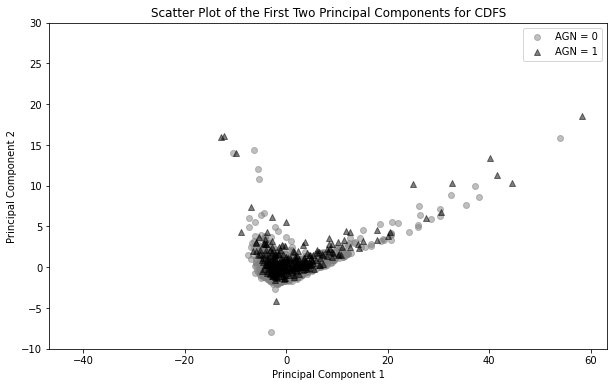

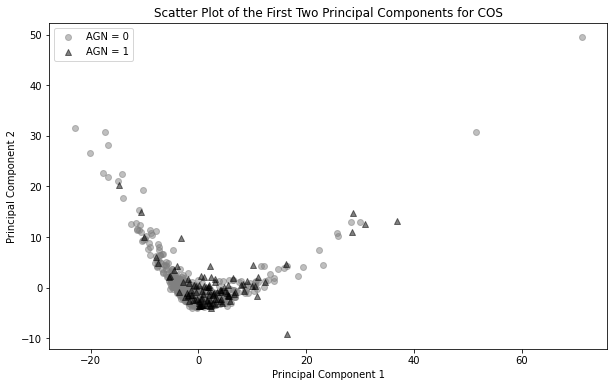

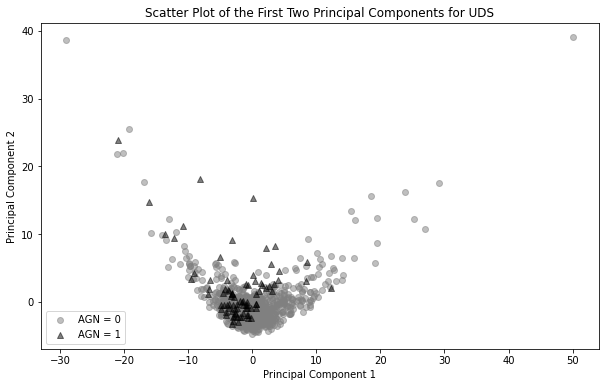

In [66]:
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components with different markers for AGN types
def scatter_plot(pca_df, title, ylim=None):
    plt.figure(figsize=(10, 6))
    
    # Define markers and colors
    markers = {0: 'o', 1: '^'}  # Different markers for agn = 0 and agn = 1
    colors = {0: 'grey', 1: 'black'}  # Different colors for agn = 0 and agn = 1
    
    # Plot each AGN type with different markers
    for agn_value in markers.keys():
        subset = pca_df[pca_df['agn'] == agn_value]
        plt.scatter(subset['PC1'], subset['PC2'], alpha=0.5, marker=markers[agn_value], color=colors[agn_value], label=f'AGN = {agn_value}')
    
    plt.title(f'Scatter Plot of the First Two Principal Components for {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    if ylim is not None:
        plt.ylim(-10, ylim)  # Set the upper limit for y-axis if specified
    
    plt.legend()
    plt.show()

# Plot for each dataset with a specific ylim for CDFS
scatter_plot(cdfs_pca_df, "CDFS", ylim=30)
scatter_plot(cos_pca_df, "COS")
scatter_plot(uds_pca_df, "UDS")


In [9]:
from pkg import * 

cd = cdfs[cdfs['HR'] > -98]

print(max(cd.HR))

0.87


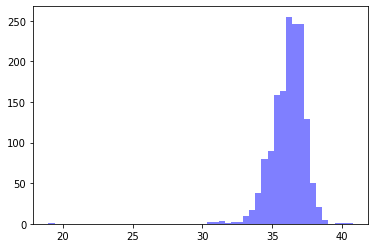

In [6]:
# print distribution of log_agn_luminosity

plt.hist(cd.log_agn_luminosity, bins = 50, color = 'b', alpha = 0.5)
plt.show()

In [7]:
print(min(cdfs.HR))

-99.0
